# **Project on Time Series Forecasting of Temperature Using LSTM Models**

This project explores the power of AI and Machine Learning in time series forecasting, specifically focusing on predicting temperature trends. By leveraging both univariate and multivariate LSTM (Long Short-Term Memory) models, it aims to provide accurate temperature forecasts. Whether you're a beginner in AI or looking to dive deeper into time series analysis, this project offers valuable insights into using advanced machine learning techniques for real-world applications.

# **1) Univariate Time Series Forecasting using LSTMs**

In [14]:


#Setup and Load Data

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv1D, MaxPooling1D, Flatten, Bidirectional
from tensorflow.keras.optimizers import Adam


In [6]:
# # Upload and load the data
# from google.colab import files
# uploaded = files.upload()

# # Load dataset
# file_name = list(uploaded.keys())[0]  # Get the uploaded file name
# weather_data = pd.read_csv(file_name)

# Load dataset directly from file path
weather_data = pd.read_csv('/content/weather.csv')


In [7]:
# Inspect the dataset
print("Dataset Head:")
print(weather_data.head())

print("\nDataset Info:")
print(weather_data.info())

print("\nDataset Description:")
print(weather_data.describe())

# Parse 'date' column and set as index
weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data.set_index('date', inplace=True)


Dataset Head:
                  date  Summary  PrecipType  Temperature  ApparentTemperature  \
0  2006-03-31 22:00:00       19           0     9.472222             7.388889   
1  2006-03-31 23:00:00       19           0     9.355556             7.227778   
2  2006-04-01 00:00:00       17           0     9.377778             9.377778   
3  2006-04-01 01:00:00       19           0     8.288889             5.944444   
4  2006-04-01 02:00:00       17           0     8.755556             6.977778   

   Humidity  WindSpeed  WindBearings  Visibilty  Pressure  
0      0.89    14.1197           251    15.8263   1015.13  
1      0.86    14.2646           259    15.8263   1015.63  
2      0.89     3.9284           204    14.9569   1015.94  
3      0.83    14.1036           269    15.8263   1016.41  
4      0.83    11.0446           259    15.8263   1016.51  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column    

In [8]:
# Select the 'Temperature' column for univariate analysis
temperature_data = weather_data[['Temperature']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_scaled = scaler.fit_transform(temperature_data)



In [9]:
# Split data into training, validation, and test sets
train_size = int(len(temperature_scaled) * 0.7)
val_size = int(len(temperature_scaled) * 0.15)
test_size = len(temperature_scaled) - train_size - val_size

train_data = temperature_scaled[:train_size]
val_data = temperature_scaled[train_size:train_size + val_size]
test_data = temperature_scaled[train_size + val_size:]

print(f"Train size: {len(train_data)}, Validation size: {len(val_data)}, Test size: {len(test_data)}")



Train size: 67517, Validation size: 14467, Test size: 14469


In [10]:
# Define sequence length
sequence_length = 60

# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(data[i, 0])  # Target is the next temperature value
    return np.array(X), np.array(y)



In [11]:
# Create sequences for training, validation, and testing
X_train, y_train = create_sequences(train_data, sequence_length)
X_val, y_val = create_sequences(val_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Reshape inputs for LSTM [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

print(f"Training data shape: {X_train.shape}, Validation data shape: {X_val.shape}, Test data shape: {X_test.shape}")


Training data shape: (67457, 60, 1), Validation data shape: (14407, 60, 1), Test data shape: (14409, 60, 1)


# **Vanilla LSTM**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2109/2109 - 53s - 25ms/step - loss: 0.0030 - val_loss: 4.2920e-04
Epoch 2/20
2109/2109 - 80s - 38ms/step - loss: 5.8130e-04 - val_loss: 3.6177e-04
Epoch 3/20
2109/2109 - 83s - 40ms/step - loss: 5.5047e-04 - val_loss: 5.6271e-04
Epoch 4/20
2109/2109 - 82s - 39ms/step - loss: 5.2792e-04 - val_loss: 3.7589e-04
Epoch 5/20
2109/2109 - 50s - 24ms/step - loss: 5.1961e-04 - val_loss: 3.6430e-04
Epoch 6/20
2109/2109 - 83s - 39ms/step - loss: 5.0592e-04 - val_loss: 3.2775e-04
Epoch 7/20
2109/2109 - 84s - 40ms/step - loss: 4.9788e-04 - val_loss: 3.3916e-04
Epoch 8/20
2109/2109 - 80s - 38ms/step - loss: 4.8972e-04 - val_loss: 3.6302e-04
Epoch 9/20
2109/2109 - 81s - 38ms/step - loss: 4.8621e-04 - val_loss: 3.3141e-04
Epoch 10/20
2109/2109 - 83s - 39ms/step - loss: 4.7698e-04 - val_loss: 4.2482e-04
Epoch 11/20
2109/2109 - 82s - 39ms/step - loss: 4.8175e-04 - val_loss: 9.3425e-04
Epoch 12/20
2109/2109 - 49s - 23ms/step - loss: 4.8175e-04 - val_loss: 3.1209e-04
Epoch 13/20
2109/2109 - 51s -

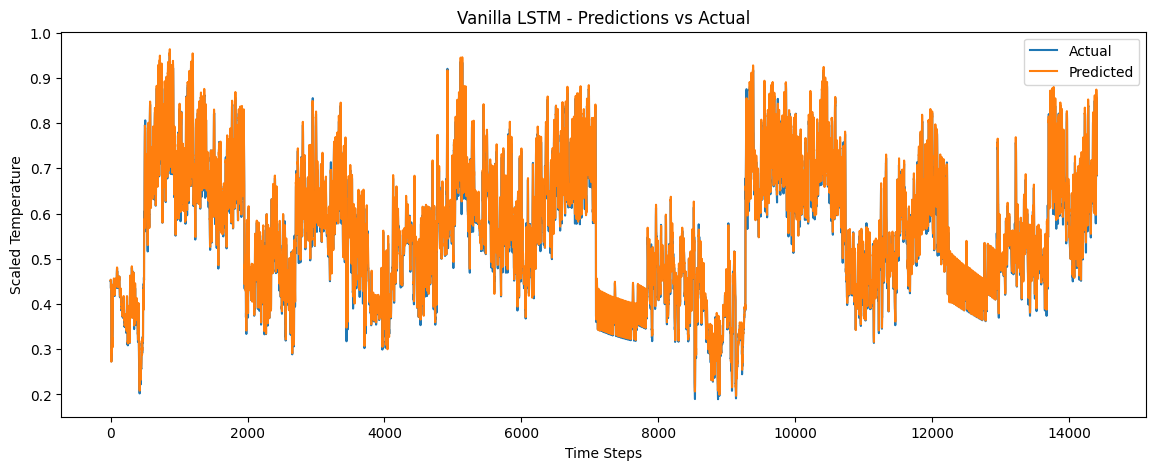

In [12]:
#Vanilla LSTM

# Build Vanilla LSTM
vanilla_model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
vanilla_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
vanilla_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=2
)

# Evaluate the model
test_loss = vanilla_model.evaluate(X_test, y_test, verbose=2)
print(f"Vanilla LSTM Test Loss: {test_loss}")

# Predict
y_pred_vanilla = vanilla_model.predict(X_test)

# Visualize Predictions
plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_vanilla, label='Predicted')
plt.title('Vanilla LSTM - Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Temperature')
plt.legend()
plt.show()



# **Stacked LSTM**

Epoch 1/20
2109/2109 - 121s - 57ms/step - loss: 0.0034 - val_loss: 4.1784e-04
Epoch 2/20
2109/2109 - 116s - 55ms/step - loss: 6.0489e-04 - val_loss: 6.2974e-04
Epoch 3/20
2109/2109 - 114s - 54ms/step - loss: 5.5390e-04 - val_loss: 3.3159e-04
Epoch 4/20
2109/2109 - 117s - 55ms/step - loss: 5.2269e-04 - val_loss: 0.0027
Epoch 5/20
2109/2109 - 140s - 66ms/step - loss: 5.1796e-04 - val_loss: 3.7147e-04
Epoch 6/20
2109/2109 - 142s - 68ms/step - loss: 5.0164e-04 - val_loss: 6.1083e-04
Epoch 7/20
2109/2109 - 141s - 67ms/step - loss: 4.9870e-04 - val_loss: 3.6073e-04
Epoch 8/20
2109/2109 - 116s - 55ms/step - loss: 4.9200e-04 - val_loss: 7.3111e-04
Epoch 9/20
2109/2109 - 140s - 66ms/step - loss: 4.8887e-04 - val_loss: 3.3570e-04
Epoch 10/20
2109/2109 - 144s - 68ms/step - loss: 4.8746e-04 - val_loss: 3.5896e-04
Epoch 11/20
2109/2109 - 141s - 67ms/step - loss: 4.8090e-04 - val_loss: 3.1373e-04
Epoch 12/20
2109/2109 - 143s - 68ms/step - loss: 4.7424e-04 - val_loss: 0.0011
Epoch 13/20
2109/2109 - 1

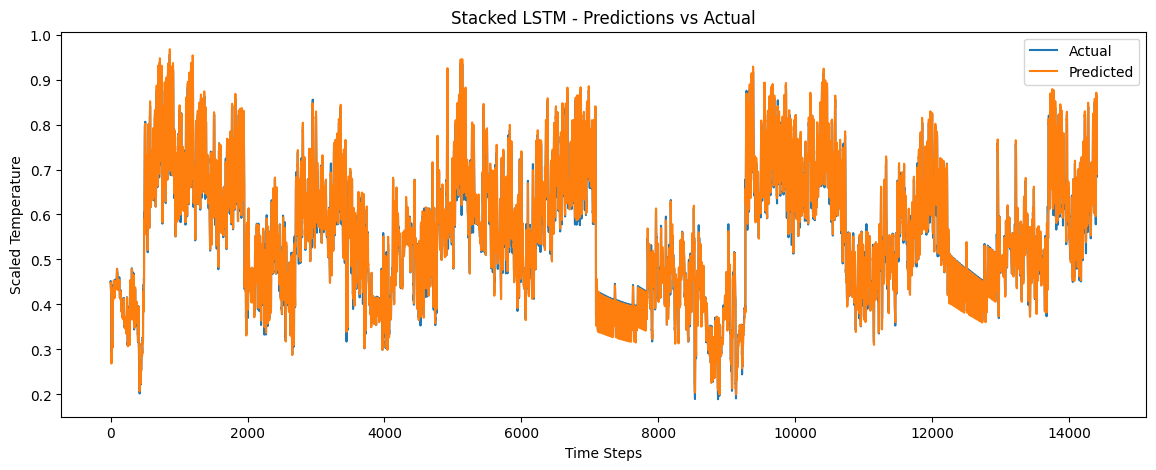

In [13]:
#Stacked LSTM

stacked_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])

stacked_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

stacked_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=2
)

stacked_loss = stacked_model.evaluate(X_test, y_test, verbose=2)
print(f"Stacked LSTM Test Loss: {stacked_loss}")

y_pred_stacked = stacked_model.predict(X_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_stacked, label='Predicted')
plt.title('Stacked LSTM - Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Temperature')
plt.legend()
plt.show()



# **Bidirectional LSTM**

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2109/2109 - 90s - 43ms/step - loss: 0.0031 - val_loss: 5.7885e-04
Epoch 2/20
2109/2109 - 141s - 67ms/step - loss: 6.1018e-04 - val_loss: 4.5029e-04
Epoch 3/20
2109/2109 - 84s - 40ms/step - loss: 5.5580e-04 - val_loss: 4.9751e-04
Epoch 4/20
2109/2109 - 144s - 68ms/step - loss: 5.2908e-04 - val_loss: 3.5781e-04
Epoch 5/20
2109/2109 - 140s - 66ms/step - loss: 5.0954e-04 - val_loss: 3.6496e-04
Epoch 6/20
2109/2109 - 142s - 67ms/step - loss: 5.0244e-04 - val_loss: 3.6507e-04
Epoch 7/20
2109/2109 - 142s - 67ms/step - loss: 4.9064e-04 - val_loss: 3.6146e-04
Epoch 8/20
2109/2109 - 85s - 40ms/step - loss: 4.8762e-04 - val_loss: 3.9731e-04
Epoch 9/20
2109/2109 - 143s - 68ms/step - loss: 4.7950e-04 - val_loss: 3.2269e-04
Epoch 10/20
2109/2109 - 140s - 66ms/step - loss: 4.7434e-04 - val_loss: 3.1978e-04
Epoch 11/20
2109/2109 - 144s - 68ms/step - loss: 4.6847e-04 - val_loss: 3.1478e-04
Epoch 12/20
2109/2109 - 140s - 66ms/step - loss: 4.6419e-04 - val_loss: 3.3602e-04
Epoch 13/20
2109/2109 - 87s - 4

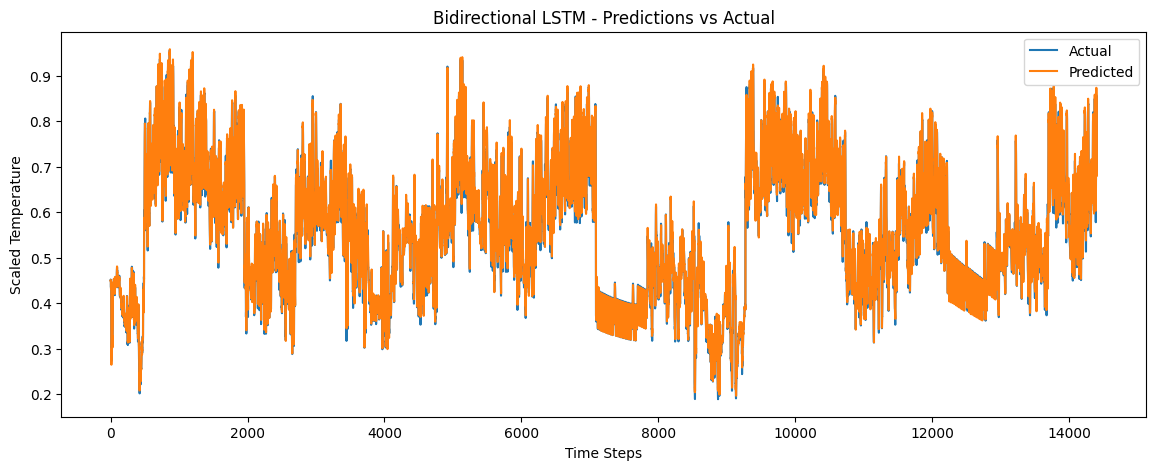

In [15]:
#Bidirectional LSTM

bidir_model = Sequential([
    Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

bidir_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

bidir_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=2
)

bidir_loss = bidir_model.evaluate(X_test, y_test, verbose=2)
print(f"Bidirectional LSTM Test Loss: {bidir_loss}")

y_pred_bidir = bidir_model.predict(X_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bidir, label='Predicted')
plt.title('Bidirectional LSTM - Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Temperature')
plt.legend()
plt.show()



# **CNN-LSTM**

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2109/2109 - 39s - 19ms/step - loss: 0.0032 - val_loss: 9.6413e-04
Epoch 2/20
2109/2109 - 35s - 17ms/step - loss: 0.0011 - val_loss: 8.0390e-04
Epoch 3/20
2109/2109 - 36s - 17ms/step - loss: 0.0010 - val_loss: 7.3748e-04
Epoch 4/20
2109/2109 - 41s - 19ms/step - loss: 9.8385e-04 - val_loss: 7.7332e-04
Epoch 5/20
2109/2109 - 44s - 21ms/step - loss: 9.5054e-04 - val_loss: 7.7237e-04
Epoch 6/20
2109/2109 - 37s - 18ms/step - loss: 9.3394e-04 - val_loss: 0.0011
Epoch 7/20
2109/2109 - 36s - 17ms/step - loss: 9.0830e-04 - val_loss: 7.5209e-04
Epoch 8/20
2109/2109 - 37s - 18ms/step - loss: 9.0281e-04 - val_loss: 6.9256e-04
Epoch 9/20
2109/2109 - 36s - 17ms/step - loss: 8.9047e-04 - val_loss: 0.0011
Epoch 10/20
2109/2109 - 41s - 19ms/step - loss: 8.9498e-04 - val_loss: 6.9020e-04
Epoch 11/20
2109/2109 - 36s - 17ms/step - loss: 8.7735e-04 - val_loss: 7.0485e-04
Epoch 12/20
2109/2109 - 38s - 18ms/step - loss: 8.7017e-04 - val_loss: 8.9294e-04
Epoch 13/20
2109/2109 - 38s - 18ms/step - loss: 8.7435e-

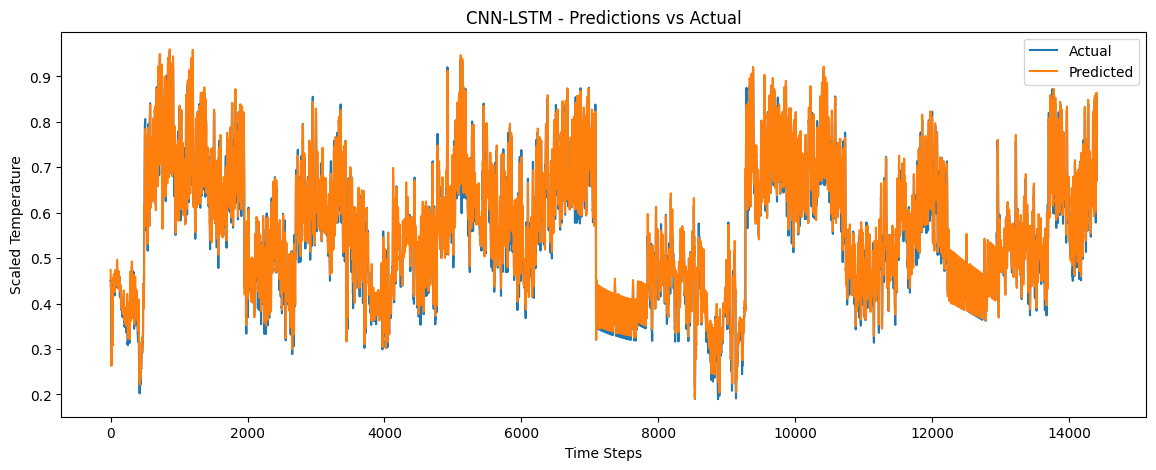

In [16]:
# CNN-LSTM

cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    LSTM(50, activation='relu'),
    Dense(1)
])

cnn_lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

cnn_lstm_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=2
)

cnn_lstm_loss = cnn_lstm_model.evaluate(X_test, y_test, verbose=2)
print(f"CNN-LSTM Test Loss: {cnn_lstm_loss}")

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='Predicted')
plt.title('CNN-LSTM - Predictions vs Actual')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Temperature')
plt.legend()
plt.show()